In [2]:
import sys, os
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pandas.io import sql
from pandas.io.json import json_normalize
import numpy as np
from sqlalchemy import types, create_engine
from datetime import date, timedelta
from datetime import datetime
import time
import re
import pylab as py
from matplotlib import gridspec
import matplotlib.dates as md
from sklearn.model_selection import LeaveOneOut
os.environ['PROJ_LIB'] = '/home/ehsan/anaconda3/share/proj'
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
def metrics(y1, y2):
  '''
  y1 and y2 are two series of the same size

  This function outputs the MAE, RMSE and R^2 
  of the cross evaluated series.

  '''
  y1 = y1.reshape(-1)
  y2 = y2.reshape(-1)
  RMSE = np.sqrt(np.mean((y1-y2)**2))
  MAE = np.mean(np.abs(y1-y2))
  R2 = r2_score(y1, y2)
  print('MAE: %.2f'%MAE, ' RMSE: %.2f'%RMSE, ' R^2: %.2f'%R2)
########################################

In [6]:
df = pd.read_csv("tmin_predictors.csv", encoding = "ISO-8859-1", engine='python')

df.head(50)

,SKN,Island,albedo,coastDist,dem_250,lai,rf,tpi,windSpeed,LON,LAT,optional
0,2.32,BI,11.683500,11247.605469,746.064880,0.797200,877.497192,-2.885605,0.994924,-155.789440,19.107780,True
1,3.90,BI,12.331667,12794.167969,930.497986,0.794778,1607.603271,-0.835584,2.833071,-155.669722,19.100833,True
2,9.20,BI,11.683500,6832.974609,706.599365,0.668505,2738.473389,-0.192528,2.934816,-155.125833,19.348056,True
3,12.15,BI,11.870667,1069.911377,28.257198,0.723024,993.787048,-2.831280,2.213946,-155.515274,19.133103,True
4,14.00,BI,12.206250,3764.179688,202.671707,0.694749,1062.008423,-7.368172,2.278268,-155.585550,19.060328,True
5,21.30,BI,14.870334,7397.353027,362.006073,0.878270,1493.430908,-4.092196,1.727876,-155.488610,19.206670,True
6,23.00,BI,10.935417,12784.630859,1765.574707,0.429247,886.509338,-0.460424,1.307876,-155.780000,19.232222,True
7,24.10,BI,11.683500,2378.271973,430.339142,0.820525,1079.461548,-0.442420,0.919179,-155.873877,19.270322,True
8,24.40,BI,11.870667,1068.992676,119.717140,0.635604,881.841003,-12.616026,0.929014,-155.883000,19.317000,True
9,26.20,BI,12.978750,1904.795532,438.531311,0.790869,1252.690430,3.399662,1.098583,-155.912213,19.489757,True


In [ ]:
df.columns[:20]

In [42]:
meta_columns = ['SKN', 'Station.Name', 'Observer', 'Network', 'Island', 'ELEV.m.',
       'LAT', 'LON', 'NCEI.id', 'NWS.id', 'NESDIS.id', 'SCAN.id',
       'SMART_NODE_RF.id']
Temp_columns = df.columns[13:]
Temp_columns

Index(['X1990.01.01', 'X1990.01.02', 'X1990.01.03', 'X1990.01.04',
       'X1990.01.05', 'X1990.01.06', 'X1990.01.07', 'X1990.01.08',
       'X1990.01.09', 'X1990.01.10',
       ...
       'X2019.12.22', 'X2019.12.23', 'X2019.12.24', 'X2019.12.25',
       'X2019.12.26', 'X2019.12.27', 'X2019.12.28', 'X2019.12.29',
       'X2019.12.30', 'X2019.12.31'],
      dtype='object', length=10957)

In [43]:
df2 = df[meta_columns]
df2 = df2.set_index("SKN")

print(len(df2))

df2.head()

186


,Station.Name,Observer,Network,Island,ELEV.m.,LAT,LON,NCEI.id,NWS.id,NESDIS.id,SCAN.id,SMART_NODE_RF.id
SKN,,,,,,,,,,,,
2.32,SOUTH KONA 2 2.32,COOP,COOP,BI,647.0000,19.107780,-155.789440,USC00518652,NaN,NaN,NaN,NaN
3.90,LOWER KAHUKU CS,LOWER KAHUKU CS,RAWS,BI,953.7192,19.100833,-155.669722,NaN,LKHH1,32D620C2,NaN,NaN
9.20,Nene Cabin,Nene Cabin,RAWS,BI,710.4888,19.348056,-155.125833,NaN,AHMH1,32D64524,NaN,NaN
12.15,SEA MOUNTAIN 12.15,SEA MOUNTAIN,COOP,BI,21.0000,19.133103,-155.515274,USC00518600,NaN,NaN,NaN,NaN
14.00,NAALEHU 14,KAU SUGAR,COOP,BI,206.0000,19.060328,-155.585550,USC00516588,NaN,NaN,NaN,NaN


In [44]:
df2.groupby("Island").count()

,Station.Name,Observer,Network,ELEV.m.,LAT,LON,NCEI.id,NWS.id,NESDIS.id,SCAN.id,SMART_NODE_RF.id
Island,,,,,,,,,,,
BI,66,66,66,66,66,66,40,27,24,0,0
KA,20,20,20,20,20,20,16,7,6,0,0
KO,6,6,6,6,6,6,6,6,5,0,0
LA,3,3,3,3,3,3,3,2,1,0,0
MA,37,37,37,37,37,37,13,5,4,0,0
MO,8,8,8,8,8,8,7,5,3,0,0
OA,46,46,46,46,46,46,37,18,16,0,0


In [45]:
# df2 = df2[(df2.Island=='BI')|(df2.Island=='Bi')]
df2 = df2[(df2.Island=='MA')]
print(len(df2))

df2.head()

37


,Station.Name,Observer,Network,Island,ELEV.m.,LAT,LON,NCEI.id,NWS.id,NESDIS.id,SCAN.id,SMART_NODE_RF.id
SKN,,,,,,,,,,,,
249.1,MAKENA GOLF CRS 249.1,MAKE GC,COOP,MA,30.000,20.642089,-156.438849,USC00515842,NaN,NaN,NaN,NaN
253.0,AUWAHI HN-141,HaleNet,HaleNet,MA,1166.000,20.644222,-156.342056,NaN,NaN,NaN,NaN,NaN
258.6,OHE'O 258.6,HALEAKALA TL PK,COOP,MA,24.000,20.662925,-156.042480,USC00517000,NaN,NaN,NaN,NaN
266.0,KAUPO GAP,RAWS,RAWS,MA,1228.344,20.684167,-156.151944,USR0000HKAU,KPGH1,FA45A6E0,NaN,NaN
267.0,KULA HOSPITAL 267,KULA SATORIUM,COOP,MA,916.000,20.700140,-156.355519,USC00515004,NaN,NaN,NaN,NaN


In [46]:
df1 = df[["SKN"]+list(Temp_columns)].T

new_header = df1.iloc[0]
df1 = df1[1:] 
df1.columns = new_header 

df1.index = pd.to_datetime([x.split('X')[1] for x in df1.index.values])
df1.index.name = 'Date'

df1 = df1[list(df2.index.values)]

# df1 = df1.resample('1M').mean()

print(len(df1))
df1.tail(5)

10957


SKN,249.10,253.00,258.60,266.00,267.00,267.80,276.00,277.00,278.00,278.12,...,339.40,339.50,339.60,355.00,355.20,361.00,398.00,446.00,457.10,462.40
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df2.columns

Index(['Station.Name', 'Observer', 'Network', 'Island', 'ELEV.m.', 'LAT',
       'LON', 'NCEI.id', 'NWS.id', 'NESDIS.id', 'SCAN.id', 'SMART_NODE_RF.id'],
      dtype='object')

In [50]:
df3 = df2[["LON", "LAT", "ELEV.m."]].T
df3 = df3[list(df2.index.values)]
df3

SKN,249.10,253.00,258.60,266.00,267.00,267.80,276.00,277.00,278.00,278.12,...,339.40,339.50,339.60,355.00,355.20,361.00,398.00,446.00,457.10,462.40
LON,-156.438849,-156.342056,-156.042480,-156.151944,-156.355519,-156.321667,-156.092250,-156.107139,-156.122889,-156.142432,...,-156.248167,-156.245833,-156.256750,-156.017,-156.0414,-156.673841,-156.4100,-156.212189,-156.67611,-156.6753
LAT,20.642089,20.644222,20.662925,20.684167,20.700140,20.683056,20.726556,20.736306,20.734222,20.745677,...,20.759806,20.738194,20.710361,20.792,20.7939,20.876795,20.8887,20.890122,20.93194,20.9625
ELEV.m.,30.000000,1166.000000,24.000000,1228.344000,916.000000,1998.573600,1650.000000,1930.000000,2195.000000,2033.000000,...,2120.000000,2590.000000,2990.000000,24.000,104.0000,78.000000,12.0000,213.000000,128.00000,73.0000


<ipython-input-51-1c922e9583bb>:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map = Basemap(llcrnrlon=-160.5,llcrnrlat=18.5,urcrnrlon=-154.5,urcrnrlat=22.5, projection='cyl')
<ipython-input-51-1c922e9583bb>:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  shp_info = map.readshapefile('st99_d00','states',drawbounds=True,
<ipython-input-51-1c922e9583bb>:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  shp_info_ = map.readshapefile('st99_d00','states',drawbounds=False)


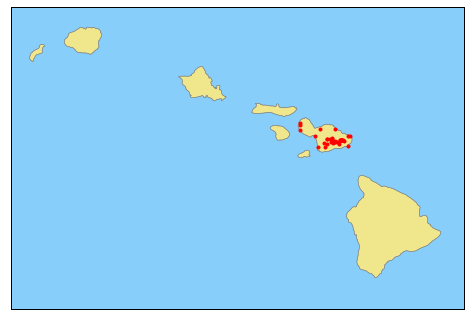

In [51]:
fig=plt.figure(figsize=(7,7))
ax = fig.add_axes([0.05,0.05,0.9,0.9])

map = Basemap(llcrnrlon=-160.5,llcrnrlat=18.5,urcrnrlon=-154.5,urcrnrlat=22.5, projection='cyl')

shp_info = map.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = map.readshapefile('st99_d00','states',drawbounds=False)


map.drawmapboundary(fill_color='lightskyblue')

for lon, lat in list(zip(df2.LON.values, df2.LAT.values)):
    
    x, y = map(lon, lat)
    map.plot(x, y, marker='o',color='red',markersize=3)

for nshape, shapedict in enumerate(map.states_info):
     if shapedict['NAME'] in ['Hawaii']:
         seg = map.states[int(shapedict['SHAPENUM'] - 1)]
         poly = Polygon(seg, facecolor='khaki', edgecolor='gray', linewidth=.45)
         ax.add_patch(poly)

# ax.annotate("Oahu",(-158.27,21.8), fontsize=12)
# ax.annotate("Maui",(-156.28,20.98), fontsize=12)
# ax.annotate("Hawaii",(-155.8,19.54), fontsize=12)
# ax.annotate("Molokai",(-157.23,21.31), fontsize=12)
# ax.annotate("Kauai",(-159.7,21.7), fontsize=12)
# ax.annotate("Lanai",(-157.55,20.74), fontsize=12)

# ax.annotate("HAWAII",(-160.24,18.75), fontsize=16)

In [52]:
df_station =  df3.T
df_station = df_station.join(df1.T, how='left')

print(len(df_station))

df_station.head()

37


,LON,LAT,ELEV.m.,1990-01-01 00:00:00,1990-01-02 00:00:00,1990-01-03 00:00:00,1990-01-04 00:00:00,1990-01-05 00:00:00,1990-01-06 00:00:00,1990-01-07 00:00:00,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
SKN,,,,,,,,,,,,,,,,,,,,,
249.1,-156.438849,20.642089,30.000,17.8,18.3,17.2,17.2,17.2,16.7,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253.0,-156.342056,20.644222,1166.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258.6,-156.042480,20.662925,24.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266.0,-156.151944,20.684167,1228.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267.0,-156.355519,20.700140,916.000,13.3,13.9,12.2,11.7,11.7,10.0,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
Date = pd.to_datetime("2010-05-15")

data = df_station[["LON", "LAT", "ELEV.m.", Date]].dropna()

print(len(data))

data.head()

22


,LON,LAT,ELEV.m.,2010-05-15 00:00:00
SKN,,,,
249.1,-156.438849,20.642089,30.000,18.30
253.0,-156.342056,20.644222,1166.000,12.17
258.6,-156.042480,20.662925,24.000,21.10
266.0,-156.151944,20.684167,1228.344,10.56
267.0,-156.355519,20.700140,916.000,11.70


In [62]:
X = data[["LON", "LAT", "ELEV.m."]].values

y = data[Date].values

In [63]:
from scipy.optimize import minimize
import george
from george import kernels
from sklearn.model_selection import KFold

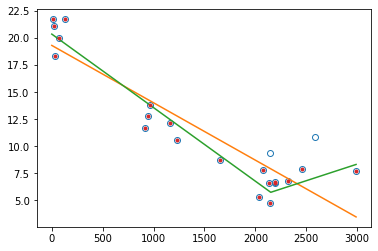

In [64]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x+b

def bilinear(x, a, b, c):
    
    left  = a*x+b
    right = c*(x-2150) + (a*2150+b) 
    
    try:
        y = np.asarray([left[i] if x[i]<=2150 else right[i] for i in range(len(x))])
        return y
    except:
        if x<=2150:
            return left
        else:
            return right

plt.plot(X[:,2], y, 'o', mfc='white')




u = np.arange(np.round(np.max(X[:,2])))

fit, cov = curve_fit(linear, X[:,2], y, sigma=y*0+1)
v1 = linear(u, fit[0], fit[1])

fit, cov = curve_fit(bilinear, X[:,2], y, sigma=y*0+1)



model = bilinear(X[:,2], fit[0], fit[1], fit[2])

indx, = np.where(np.abs(model-y)<3)

fit, cov = curve_fit(bilinear, X[:,2][indx], y[indx], sigma=y[indx]*0+1)


model = bilinear(X[:,2], fit[0], fit[1], fit[2])

indx, = np.where(np.abs(model-y)<3)

fit, cov = curve_fit(bilinear, X[:,2][indx], y[indx], sigma=y[indx]*0+1)

plt.plot(u, v1)

v2 = bilinear(u, fit[0], fit[1], fit[2])
plt.plot(u, v2)

plt.plot(X[:,2][indx], y[indx], '.')

In [66]:
def nll_fn2(X, y):
    
    

    def step(theta):
        
#         kf = KFold(n_splits=3)
        loo = LeaveOneOut()
        XI2 = 0
        
#         for train_index, test_index in kf.split(X):
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
        
            N = X_train.shape[0]
            
            zp = theta[0]
            slope = theta[1]
            l = np.exp(theta[2])
            sigma = np.exp(theta[3])
            s2 = theta[4]

            y_model = slope*X_train[:,2]+zp
            ind, = np.where(X_train[:,2]>2150)
            y_model[ind] += s2*(X_train[:,2][ind]-2150)

            kernel = sigma * kernels.ExpSquaredKernel([l , l], ndim=2)
            gp = george.GP(kernel)
            gp.compute(X_train[:,:2], np.exp(theta[5]))

            y_res_test, _ = gp.predict(y_train-y_model, X_test[:,:2], return_var=True)
            
            
            y_model_test = slope*X_test[:,2]+zp
            ind, = np.where(X_test[:,2]>2150)
            y_model_test[ind] += s2*(X_test[:,2][ind]-2150)           
            
            XI2 += np.sum((y_res_test+y_model_test - y_test)**2)
#             XI2 += np.sum(np.abs(y_res_test+y_model_test - y_test))
            
        return XI2
    
    
    return step


# Maximum Likelihood
pos = minimize(nll_fn2(X[indx], y[indx]), [10, -0.002, 1, 0.1, 0, 0], method='SLSQP', 
              bounds=((0,60), (-0.1, -0.0001), 
                      (None, 10), (None,10), 
                      (-0.0001, 0), (-10,2)))
print(pos)

     fun: 84.8434387222577
     jac: array([-9.52434540e-03,  5.53329277e+00, -1.22709274e-01,  1.07652664e-01,
       -1.05206171e+04, -2.34228134e-01])
 message: 'Optimization terminated successfully.'
    nfev: 113
     nit: 16
    njev: 12
  status: 0
 success: True
       x: array([ 9.76294424e+00, -5.25013528e-03,  6.41127856e+00, -3.13273291e+00,
       -1.07862646e-06, -5.69714497e+00])


Text(0, 0.5, 'Temperature [oC]')

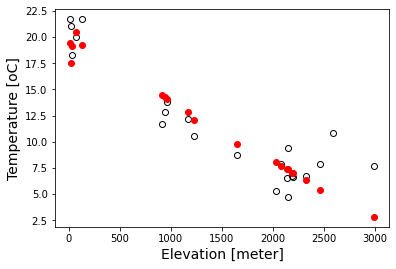

In [67]:
plt.plot(df3.iloc[2].values, df1.loc[Date].values, 'ko', mfc='none')

theta = pos.x
loo = LeaveOneOut()

X_ = X[indx]
y_ = y[indx]

u = []
v = []

for train_index, test_index in loo.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]


    N = X_train.shape[0]
    zp = theta[0]
    slope = theta[1]
    l = np.exp(theta[2])
    sigma = np.exp(theta[3])
    s2 = theta[4]

    y_model = slope*X_train[:,2]+zp
    ind, = np.where(X_train[:,2]>2150)
    y_model[ind] += s2*(X_train[:,2][ind]-2150)

    kernel = sigma * kernels.ExpSquaredKernel([l,l], ndim=2)
    gp = george.GP(kernel)
    gp.compute(X_train[:,:2], np.exp(theta[5]))

    y_res_test, _ = gp.predict(y_train-y_model, X_test[:,:2], return_var=True)


    y_model_test = slope*X_test[:,2]+zp
    ind, = np.where(X_test[:,2]>2150)
    y_model_test[ind] += s2*(X_test[:,2][ind]-2150)    
    
    
    plt.plot(X_test[:,2], y_res_test+y_model_test , 'ro')
    
#     u.append(y_res_test[0])
#     v.append(y_test[0]-y_model_test[0])
    
    u.append(y_res_test[0]+y_model_test[0])
    v.append(y_test[0])
    
    
u = np.asarray(u)
v = np.asarray(v)

plt.xlabel("Elevation [meter]", fontsize=14)
plt.ylabel("Temperature [oC]", fontsize=14)

MAE: 1.61  RMSE: 2.06  R^2: 0.85


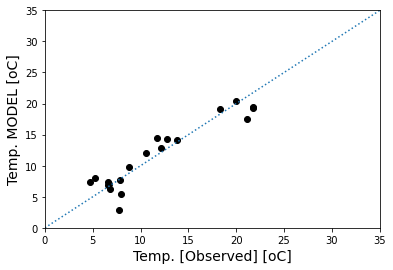

In [68]:
plt.plot(v, u, 'ko')

plt.xlim(0,35)
plt.ylim(0,35)

plt.plot([0,35], [0,35], ':')

plt.ylabel("Temp. MODEL [oC]", fontsize=14)
plt.xlabel("Temp. [Observed] [oC]", fontsize=14)

metrics(u, v)